In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# Matlab-style plotting
from sodapy import Socrata
import datetime
from datetime import datetime
from datetime import timedelta

In [15]:
nyc_case_hosp = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/case-hosp-death.csv')

nyc_case_hosp.drop(columns= ['HOSPITALIZED_COUNT', 'DEATH_COUNT'],inplace=True)
nyc_case_hosp.rename(columns= {'DATE_OF_INTEREST':'Date', 'CASE_COUNT':'Newcase'}, inplace = True)
nyc_case_hosp['Date'] = pd.to_datetime(nyc_case_hosp['Date'])
nyc_case_hosp['Date'] = nyc_case_hosp['Date'].dt.date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE_OF_INTEREST    69 non-null     object
 1   CASE_COUNT          69 non-null     int64 
 2   HOSPITALIZED_COUNT  69 non-null     int64 
 3   DEATH_COUNT         69 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.3+ KB


69


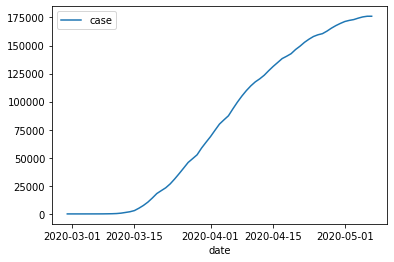

In [31]:
df_confirmed_case = pd.DataFrame(columns=['date', 'case'])
for i in range(len(nyc_case_hosp)):
    if i == 0:
        df_confirmed_case = df_confirmed_case.append(pd.DataFrame({'date':[nyc_case_hosp['Date'][i]],'case':[nyc_case_hosp['Newcase'][i]]}),ignore_index=True)
    else:
        confirmed_case = df_confirmed_case['case'][i-1] + nyc_case_hosp['Newcase'][i]
        df_confirmed_case = df_confirmed_case.append(pd.DataFrame({'date':[nyc_case_hosp['Date'][i]],'case':[confirmed_case]}),ignore_index=True)
df_confirmed_case.plot(x='date', y='case', kind='line')

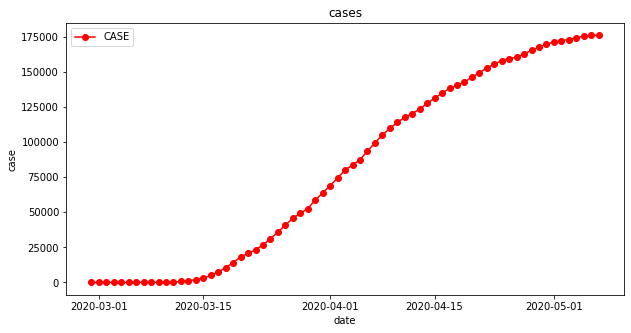

In [32]:
plt.figure(num=1, figsize=(10, 5))
plt.title("cases")
plt.plot(df_confirmed_case['date'],df_confirmed_case['case'],'o-',color = 'r',label="CASE")
plt.xlabel("date")
plt.ylabel("case")
plt.legend(loc = "best")
plt.show()

# histogram 

In [154]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get_all("8vv7-7wx3")

# Convert to pandas DataFrame
tem_df = pd.DataFrame.from_records(results)
# tem_df = tem_df[tem_df['notificationtype'].apply(lambda x: x == 'Public Health')]
tem_df.rename(columns ={'date_and_time': 'Date'}, inplace = True )
tem_df.drop(columns = ['email_body'], axis = 1, inplace=True)

tem_df['Date'] = pd.to_datetime(tem_df['Date'])
tem_df['Date'] = tem_df['Date'].dt.date

In [155]:
ds='2020-03-01'
tem_df['Date'] = tem_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
tem_df = tem_df[tem_df['Date'].apply(lambda x: x >= ds)]
date_max = tem_df['Date'].max()
week = int((datetime.strptime(date_max, '%Y-%m-%d') - datetime.strptime(ds, '%Y-%m-%d')).days/7)

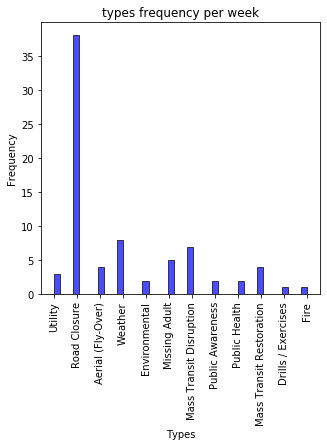

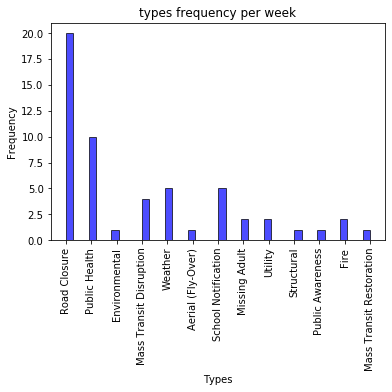

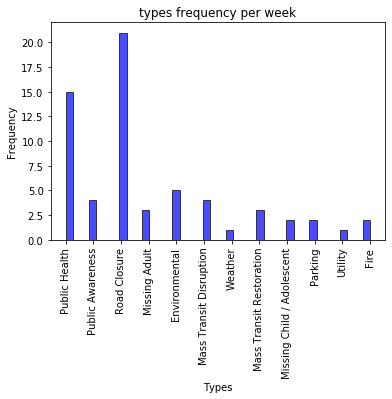

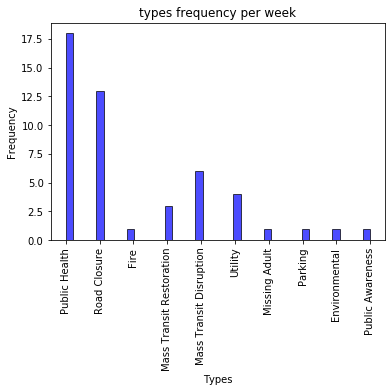

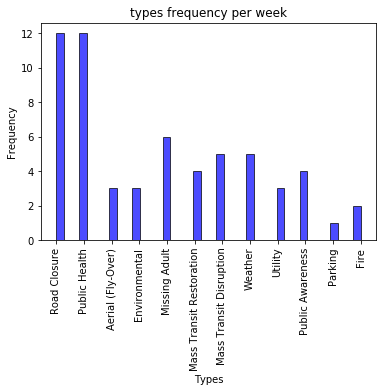

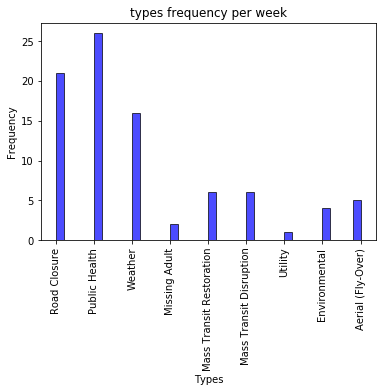

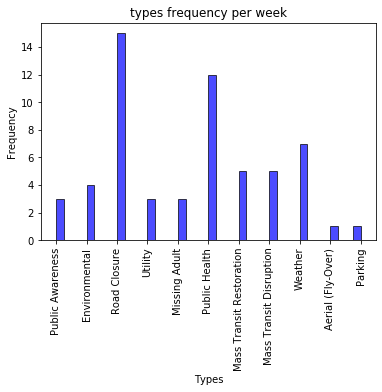

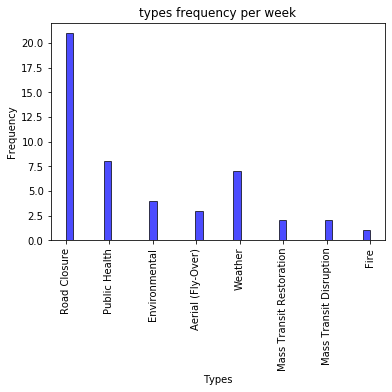

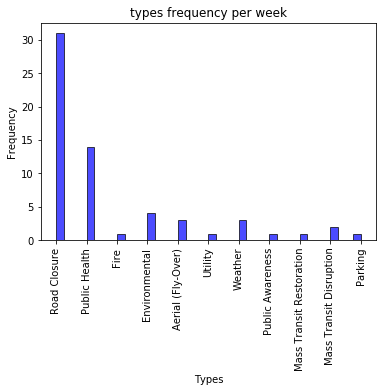

In [162]:
plt.figure(num=1, figsize=(5, 5))
ind = '2020-03-01'
# edate = datetime.datetime.strptime(ind, '%Y-%m-%d') + datetime.timedelta(days=7)
# print(edate)
# print(type(edate))
for i in range(week):
    sdate = pd.to_datetime(ind)
    edate = str(datetime.date(sdate + timedelta(days=6)))
    sdate = ind
    col = sdate + '/' + edate
    types = tem_df.loc[(tem_df['Date'] >= sdate) & (tem_df['Date'] <= edate)]['notificationtype']
    ind = str(datetime.date(pd.to_datetime(ind) + timedelta(days=7)))  
    #types.hist()
    #types.groupby('notificationtype').size().plot(kind='bar')
    plt.hist(types, bins=40, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xticks(rotation=90)
    plt.xlabel("Types")
    plt.ylabel("Frequency")
    title = "types frequency per week" + " " +col
    plt.title("types frequency per week")
    plt.show()